# Импорты и используемыe файлы

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.core.interchange.dataframe_protocol import DataFrame
import numpy as np

plt.style.use('default')

nafld_1 = pd.read_csv('data/nafld1.csv')
nafld_2 = pd.read_csv('data/nafld2.csv')
nwtco = pd.read_csv('data/nwtco.csv')

# Базовое знакомство с данными

## __Датасет nafld1__

In [2]:
nafld_1.info()
nafld_1.head()
nafld_1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17549 non-null  int64  
 1   id          17549 non-null  int64  
 2   age         17549 non-null  int64  
 3   male        17549 non-null  int64  
 4   weight      12763 non-null  float64
 5   height      14381 non-null  float64
 6   bmi         12588 non-null  float64
 7   case.id     17518 non-null  float64
 8   futime      17549 non-null  int64  
 9   status      17549 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


(17549, 10)

bmi        28.269417
weight     27.272209
height     18.052311
case.id     0.176648
dtype: float64


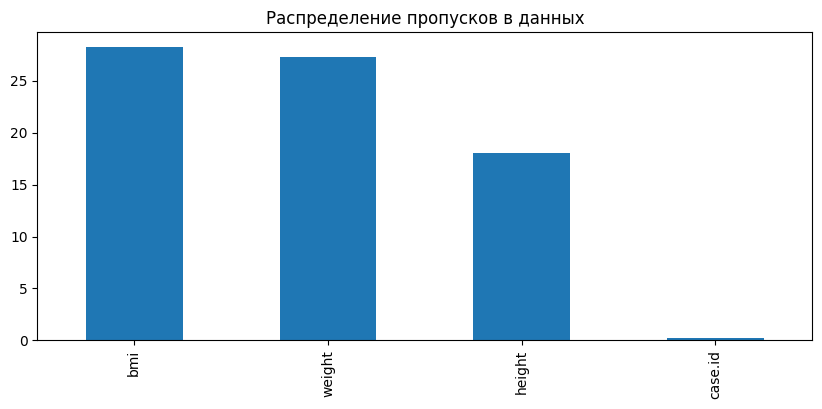

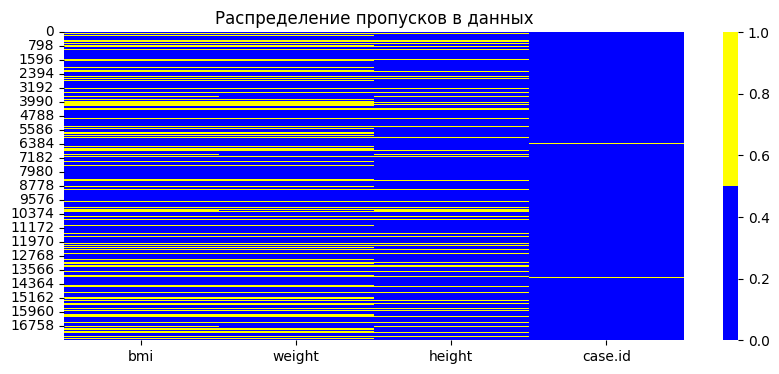

In [3]:
cols_null_nafld1 = nafld_1.isnull().mean() * 100
cols_null_nafld1 = cols_null_nafld1[cols_null_nafld1>0].sort_values(ascending=False)
print(cols_null_nafld1)

cols_null_nafld1.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_null_nafld1.index
ax = sns.heatmap(
    nafld_1[cols].isnull(),
    cmap=sns.color_palette(colors),
)
ax.set_title('Распределение пропусков в данных');

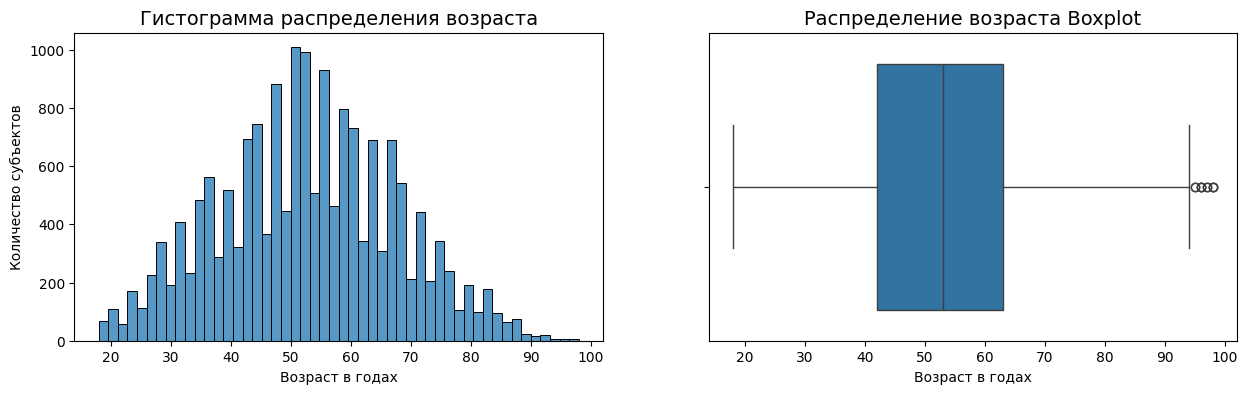

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=nafld_1, x='age', ax=axes[0]);
histplot.set_title('Гистограмма распределения возраста', fontsize=14);
histplot.set_xlabel('Возраст в годах', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);


boxplot = sns.boxplot(data=nafld_1, x='age', ax=axes[1]);
boxplot.set_title('Распределение возраста Boxplot', fontsize=14);
boxplot.set_xlabel('Возраст в годах', fontsize=10);

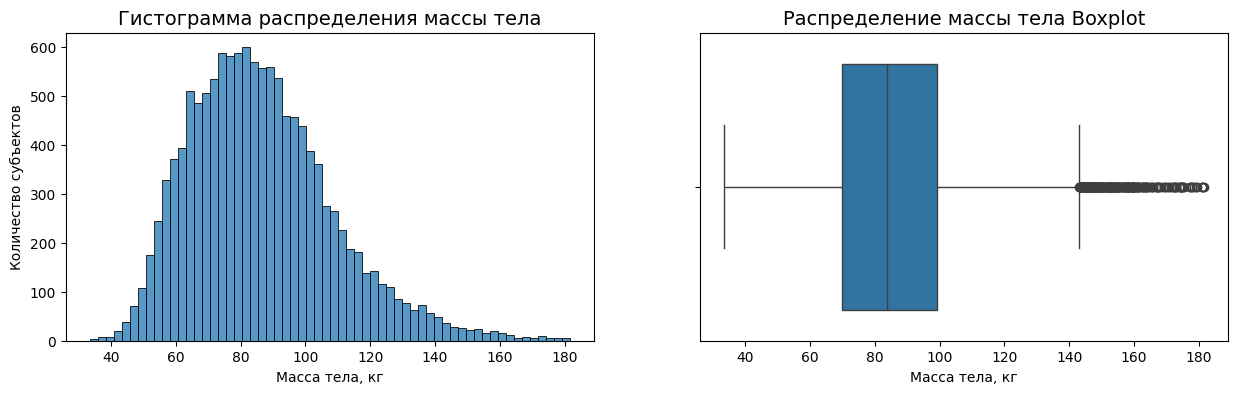

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=nafld_1, x='weight', ax=axes[0]);
histplot.set_title('Гистограмма распределения массы тела', fontsize=14);
histplot.set_xlabel('Масса тела, кг', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);


boxplot = sns.boxplot(data=nafld_1, x='weight', ax=axes[1]);
boxplot.set_title('Распределение массы тела Boxplot', fontsize=14);
boxplot.set_xlabel('Масса тела, кг', fontsize=10);


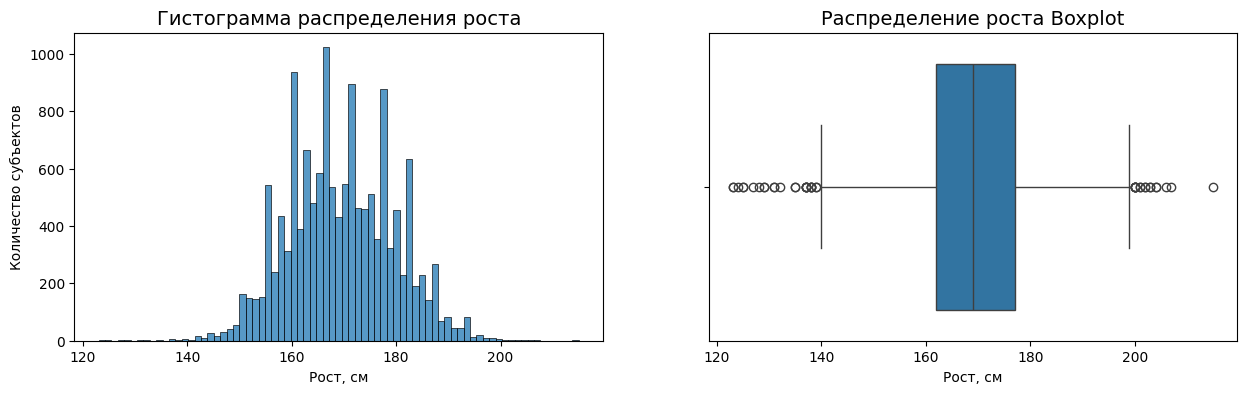

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=nafld_1, x='height', ax=axes[0]);
histplot.set_title('Гистограмма распределения роста', fontsize=14);
histplot.set_xlabel('Рост, см', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);


boxplot = sns.boxplot(data=nafld_1, x='height', ax=axes[1]);
boxplot.set_title('Распределение роста Boxplot', fontsize=14);
boxplot.set_xlabel('Рост, см', fontsize=10);


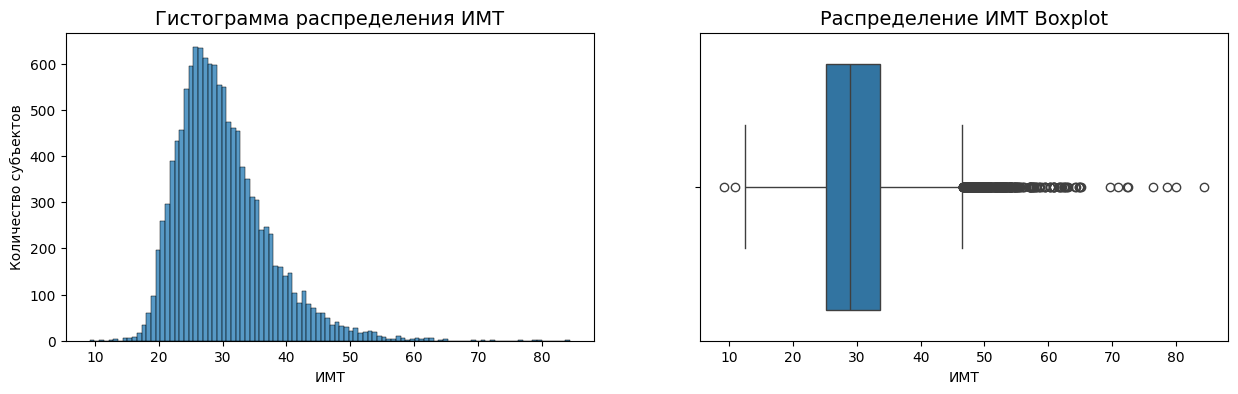

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=nafld_1, x='bmi', ax=axes[0]);
histplot.set_title('Гистограмма распределения ИМТ', fontsize=14);
histplot.set_xlabel('ИМТ', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);


boxplot = sns.boxplot(data=nafld_1, x='bmi', ax=axes[1]);
boxplot.set_title('Распределение ИМТ Boxplot', fontsize=14);
boxplot.set_xlabel('ИМТ', fontsize=10);

### Выводы по датасету __nafld_1__
Датасет состоит из 10 столбцов и 17549 строк, в нём отражены основные данные субъекта: id, возраст в годах, пол (0-женский, 1-мужской), масса тела в кг, рост в см, ИМТ, идентификатор случая НАЖБП, время наблюдения в днях, статус пациента (1 — умерший, 0 — живой на момент последнего визита).

Основная часть пропусков в признаках: масса тела, рост и ИМТ; но и в них доля пропусков не превышает 30%, а это значит, что при очистке данных лучше удалить отдельные записи, а не весь признак. 

Признак массы тела похож на нормальное распределение: форма колокола с левой симметрией, но с большим количеством выбросов, которые, однако, укладываются в логические рамки. Я допускаю, что пациент с НАЖБП может иметь массу тела от 140 до 200кг.

Распределение роста вызывает сомнения, есть выбросы вправо и влево, рост начинается от 120см, хотя возраст субъектов от 20лет. Рост меньше 140см и больше 210 см хоть и возможен, но повлияет на результаты.

Признак ИМТ имеет два выброса влево. ИМТ напрямую зависит от массы тела и роста, поэтому нужно будет повторно проверить распределение ИМТ после удаления выбросов в признаке "Рост".




## __Датасет nafld2__

In [8]:
nafld_2.info()
nafld_2.head()
nafld_2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400123 entries, 0 to 400122
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  400123 non-null  int64  
 1   id          400123 non-null  int64  
 2   days        400123 non-null  int64  
 3   test        400123 non-null  object 
 4   value       400123 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 15.3+ MB


(400123, 5)

In [9]:
nafld_2.head(100)

,Unnamed: 0,id,days,test,value
0,135077,1,-459,hdl,75.0
1,313143,1,-459,chol,75.0
2,135078,1,183,hdl,64.0
3,313144,1,183,chol,64.0
4,135079,1,2030,hdl,74.0
...,...,...,...,...,...
95,207463,7,-1585,hdl,58.0
96,385552,7,-1585,chol,58.0
97,207464,7,-301,hdl,75.0
98,385553,7,-301,chol,75.0


In [10]:
print(f'Исследуемые показатели в test: {list(nafld_2['test'].unique())}')
print(f'Число субъектов в nafld_2: {nafld_2['id'].nunique()}')
print(f'Число субъектов в nafld_1: {nafld_1['id'].nunique()}')

Исследуемые показатели в test: ['hdl', 'chol', 'sbp', 'dbp', 'fib4', 'smoke']
Число субъектов в nafld_2: 15666
Число субъектов в nafld_1: 17549


In [11]:
nafld_2[nafld_2['test'] == 'smoke']

,Unnamed: 0,id,days,test,value
400,9941,19,968,smoke,1.0
403,9942,19,1363,smoke,0.0
488,12144,25,953,smoke,0.0
539,6663,26,-380,smoke,0.0
540,6664,26,-171,smoke,1.0
...,...,...,...,...,...
399801,8872,17549,3065,smoke,0.0
399977,4561,17559,-365,smoke,0.0
399978,4562,17559,331,smoke,1.0
400063,4678,17563,3122,smoke,0.0


In [12]:
cols_null_nafld2 = nafld_2.isnull().mean() * 100
print(cols_null_nafld2)

Unnamed: 0    0.0
id            0.0
days          0.0
test          0.0
value         0.0
dtype: float64


### Выводы по датасету __nafld_2__
Датасет состоит из 5 столбцов и 400123 строк, в нём отражены: id, дата измерения, тип записанных данных (ЛПВП, общий холестерин, уровень САД, уровень ДАД, индекс фиброза печени, факт курения), значение записанных данных, а также неинформативный столбец 'Unnamed: 0', его следует удалить.

В данном датасете уникальному id соответствует несколько записей, которые отличаются типом записанных данных. Для удобства таблицу нужно перевести в широкую, в колонках которой будут отдельные показатели (test). Показатели замеряли неоднократно, в разные дни наблюдения, т.е. оценивались в динамике. Я оставлю первый и последний день измерения показателя и отражу в широком варианте. Промежуточные результаты сложно интерпретировать в большом датасете, т.к. продолжительность наблюдения, дни измерения показателей у каждого из субъектов отличаются. Отдельно можно разбить датасет на отдельные таблицы по id субъекта и оценивать индивидуальную динамику.

На первый взгляд, пропусков нет, но нужно проверить ЛПВП, ОХ, САД, ДАД, индекс фиброза на значение 0, после того, как я переведу таблицу в широкую. Также отличается количество уникальных id, в nafld_2 их больше. Объединение буду проводить по совпадающим id, остальные удалю.

Визуализация затруднительна до перевода таблицы в широкий формат.



## __Датасет nwtco__

In [13]:
nwtco.info()
nwtco.head()
nwtco.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    4028 non-null   int64
 1   seqno         4028 non-null   int64
 2   instit        4028 non-null   int64
 3   histol        4028 non-null   int64
 4   stage         4028 non-null   int64
 5   study         4028 non-null   int64
 6   rel           4028 non-null   int64
 7   edrel         4028 non-null   int64
 8   age           4028 non-null   int64
 9   in.subcohort  4028 non-null   bool 
dtypes: bool(1), int64(9)
memory usage: 287.3 KB


(4028, 10)

In [14]:
nwtco.head()

,Unnamed: 0,seqno,instit,histol,stage,study,rel,edrel,age,in.subcohort
0,1,1,2,2,1,3,0,6075,25,False
1,2,2,1,1,2,3,0,4121,50,False
2,3,3,2,2,1,3,0,6069,9,False
3,4,4,2,1,4,3,0,6200,28,True
4,5,5,2,2,2,3,0,1244,55,False


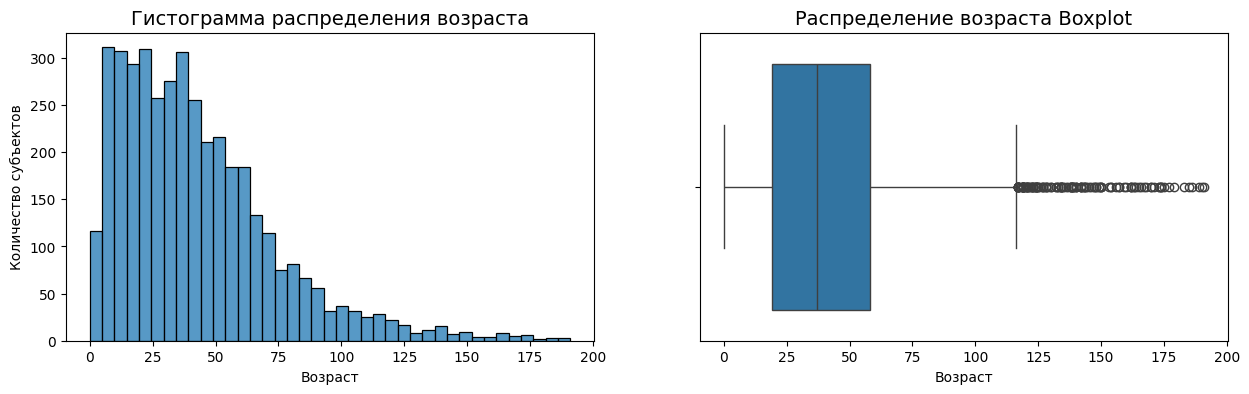

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=nwtco, x='age', ax=axes[0]);
histplot.set_title('Гистограмма распределения возраста', fontsize=14);
histplot.set_xlabel('Возраст', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);

boxplot = sns.boxplot(data=nwtco, x='age', ax=axes[1]);
boxplot.set_title('Распределение возраста Boxplot', fontsize=14);
boxplot.set_xlabel('Возраст', fontsize=10);


### Выводы по датасету __nwtco__
Датасет состоит из 10 столбцов и 4028 строк, в нём отражены: номер записи, код МО, гистологический тип опухоли, стадия опухоли, код исследования, статус рецидива, время до рецидива, возраст пациента, принадлежность к исследованию.

Распределение возраста вызывает недоумение: большое количество выбросов вправо, от 120. Очень много субъектов в возрасте от 120 (лет?) Возможно, возраст указан не годах, а месяцах. 

Датасет nwtco не имеет никакого отношения к первым двум датасетам.


# Предобработка данных

Предобработка датасета nafld_1: удалить неинформативный столбец 'Unnamed: 0', удалить дубликаты.

Предобработка датасета nafld_2: удалить неинформативный столбец 'Unnamed: 0'; удалить дубликаты; перевести датасет в широкий формат, где одному id соотвествует одна запись. 

Я не понимаю и не могу найти информацию о том, почему days в некоторых случаях имеют отрицательные значения. Отрицательные значения могут быть: показателями субъекта до даты входа в исследование (до индексации), либо это ошибка сбора данных. Для оценки динамики я буду исходить из того, что отрицательный день был раньше любого положительного. 

Объединить три датасета невозможно с логической точки зрения, в третьем датасете явно речь о детях. Нельзя объединить отождествляя порядковый номер записи и id, потому что тогда придется решать какой возраст верный. 

В связи с тем, что количество id в nafld_1 и nafld_2 разное, объединение будет по совпадающим id.

In [16]:
def get_duplicate(df, col_names=None) -> DataFrame:
    """Функция принимает датафрейм и список названий столбцов, удаляет дубликаты и нужные столбцы"""
    if col_names is not None:
        df = df.drop(columns=col_names, axis=1)
    else:
        df = df.drop_duplicates()
        df.reset_index(drop=True, inplace=True)
    return df

In [17]:
# Удаляем неинформативные столбцы и дубликаты в датасетах
nafld_1 = get_duplicate(nafld_1, ['Unnamed: 0'])
nafld_2 = get_duplicate(nafld_2, ['Unnamed: 0'])

In [18]:
nafld_2.head()

,id,days,test,value
0,1,-459,hdl,75.0
1,1,-459,chol,75.0
2,1,183,hdl,64.0
3,1,183,chol,64.0
4,1,2030,hdl,74.0


Похоже, что 'hdl' и 'chol' дублируют друг друга. Проверю некоторые тесты на дублирование.

In [19]:
def identity_test(test_1: str, test_2: str, group_tests_data: dict) -> DataFrame:
    """Функция принимает сравниваемые признаки и словарь из датафреймов, 
        а возвращает долю совпадений"""
    test_1_df = get_duplicate(group_tests_data[test_1])
    test_2_df = get_duplicate(group_tests_data[test_2])
    test_eq = test_1_df.eq(test_2_df)
    return test_eq['value'].value_counts(normalize=True)

# Создаем словарь, где ключ это название теста, а значение - сгруппированная по этому тесту таблица
group_test = dict((k[0], v) for k, v in [*nafld_2.groupby(['test'])])

# Создаем кортеж из сравниваемых величин
SAME_TESTS = (('chol', 'hdl'), ('sbp', 'dbp'))

# Несколько значений проще проверить в цикле
for test1, test2 in SAME_TESTS:
    proportion = identity_test(test1, test2, group_test)
    print(f'Сравниваемые величины: {test1}, {test2}')
    print(f'Результат проверки на дублирование значений: \n {proportion}')
    print()


Сравниваемые величины: chol, hdl
Результат проверки на дублирование значений: 
 value
True     0.766906
False    0.233094
Name: proportion, dtype: float64

Сравниваемые величины: sbp, dbp
Результат проверки на дублирование значений: 
 value
True    1.0
Name: proportion, dtype: float64



Значения hdl и chol совпадают в 77% случаев. Чтобы не загромождать последующую широкую таблицу, я удалю все записи hdl.

Значения sbp и dbp совпадают в 100% случаев. Удаляем все записи dbp, т.к. судя по значениям, это САД.

In [20]:
outliers_hdl = nafld_2[nafld_2['test'] == 'hdl']
nafld_2 = nafld_2.drop(outliers_hdl.index, axis=0)

outliers_bp = nafld_2[nafld_2['test'] == 'dbp']
nafld_2 = nafld_2.drop(outliers_bp.index, axis=0)
print(f'Результирующее число записей: {nafld_2.shape[0]}')

Результирующее число записей: 205434


In [21]:
def create_dict(df: DataFrame) -> dict:
    """Функция создает сложный словарь из датафрейма, ключ которого id, 
    значение id - словари, ключи которого отдельные показатели test,
    значение ключа test - словарь, ключами которого являются первый и последний день наблюдения,
    значение дней наблюдения - словари, ключами которых являются дни, а значениями - показатели теста в этот день (value test)"""
    # Создаем пустой словарь
    user_df_min_max = {}
    # Проходимся по индексам столбцов и строкам датафрейма
    for i, row in df.iterrows():
        # Присваиваем user_id id пациента
        user_id = row['id']
        if user_id not in user_df_min_max:
            # Значениями большого словаря будут словари с ключами id
            user_df_min_max[user_id] = {}
        
        # Значениями id будет словарь user_tests, ключами которого будут test
        user_tests = user_df_min_max[user_id]
        # По ключу каждого test создаем новый словарь
        if row['test'] not in user_tests:
            # Значением словаря user_data будет пока пустой словарь
            user_tests[row['test']] = {}
        
         # Значениями test будет словарь values, ключами которого будут дни
        values_tests = user_tests[row['test']]
        
        # Значениями values_tests будут словари, ключами которых будут словари первого и последнего дня, а значениями - значения test в этот день.
        if 'min' not in values_tests or row['days'] < values_tests['min']['day']:
            values_tests['min'] = {'day': row['days'], 'value': row['value']}
            
        if 'max' not in values_tests or row['days'] > values_tests['max']['day']:
            values_tests['max'] = {'day': row['days'], 'value': row['value']}
            
    return user_df_min_max

In [22]:
nafld_dict = create_dict(nafld_2)

In [23]:
def create_df_from_dict(basic_dict: dict, cols_new_df: list) -> DataFrame:
    """Функция принимает словарь и список из названий столбцов,
    и возвращает датафрейм"""
    # Создаем пустой датафрейм с желаемыми столбцов
    new_df = pd.DataFrame(columns=cols_new_df)
    for user_id, user_data in basic_dict.items():
        # Пошагово формируем строку
        new_row = {'id' : user_id}
        for test in ('chol', 'sbp', 'fib4', 'smoke'):
            if test in user_data:
                new_row.update({
                    f"{test}_day_min": user_data[test]['min']['day'],
                    f"{test}_value_day_min": user_data[test]['min']['value'],
                    f"{test}_day_max": user_data[test]['max']['day'],
                    f"{test}_value_day_max": user_data[test]['max']['value'],
                })
                
        new_df.loc[len(new_df)] = new_row
    
    return new_df

In [24]:
col_names = ['id', 'chol_day_min', 'chol_value_day_min', 'chol_day_max', 'chol_value_day_max', 'sbp_day_min', 'sbp_value_day_min', 'sbp_day_max', 'sbp_value_day_max', 'fib4_day_min', 'fib4_value_day_min', 'fib4_day_max', 'fib4_value_day_max', 'smoke_day_min', 'smoke_value_day_min', 'smoke_day_max', 'smoke_value_day_max']   

nafld = create_df_from_dict(nafld_dict, col_names)

In [25]:
# Объединим два датасета 
general_df = nafld_1.merge(nafld, on='id', how='right')

# Разведывательный анализ данных

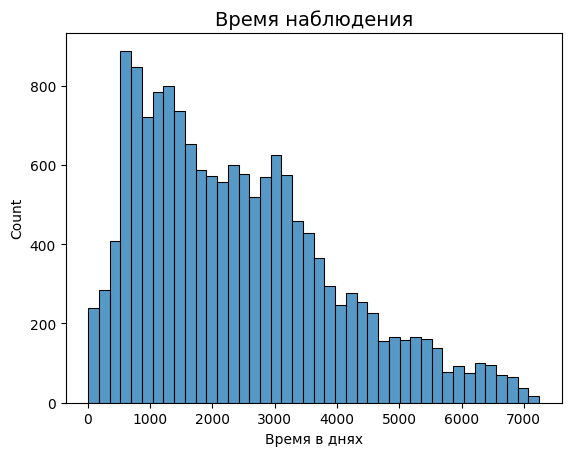

In [26]:
histplot = sns.histplot(data=general_df, x='futime');
histplot.set_title('Время наблюдения', fontsize=14);
histplot.set_xlabel('Время в днях', fontsize=10);

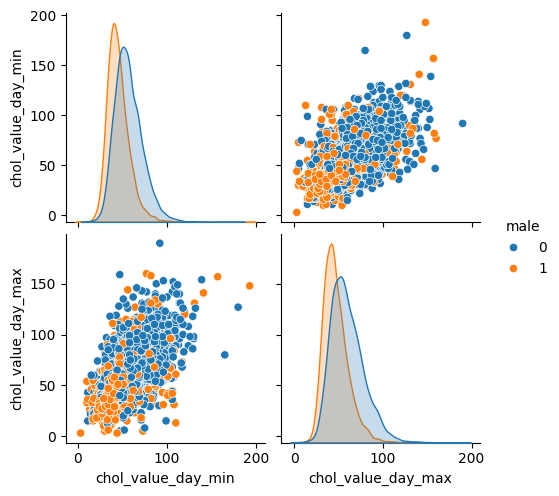

In [27]:
sns.pairplot(
    general_df, 
    vars=['chol_value_day_min','chol_value_day_max'], 
    kind='scatter', 
    hue='male');

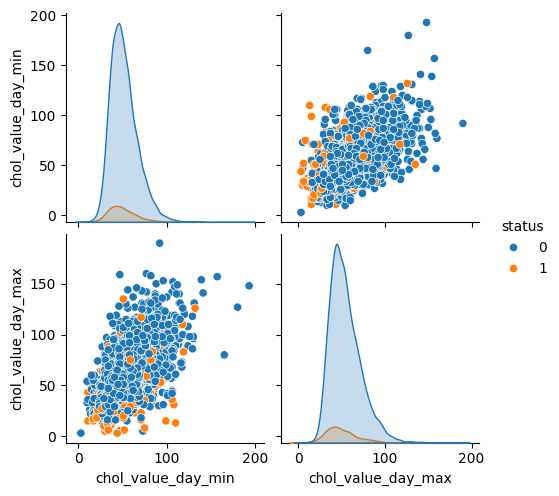

In [28]:
sns.pairplot(
    general_df, 
    vars=['chol_value_day_min','chol_value_day_max'], 
    kind='scatter', 
    hue='status');

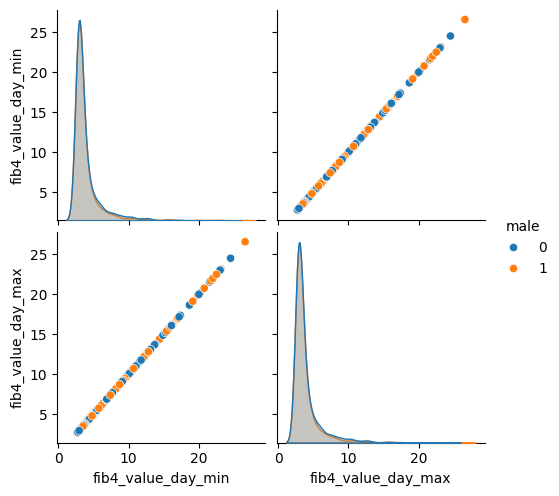

In [29]:
fig = sns.pairplot(
    general_df, 
    vars=['fib4_value_day_min', 'fib4_value_day_max'], 
    kind='scatter',
    hue='male');

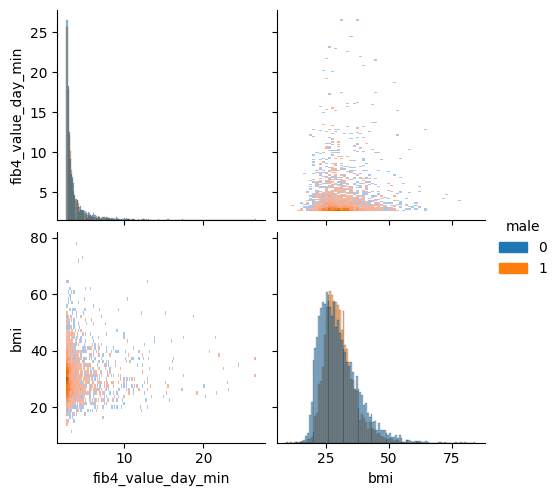

In [30]:
fig = sns.pairplot(
    general_df, 
    vars=['fib4_value_day_min', 'bmi'], 
    kind='hist',
    hue='male');

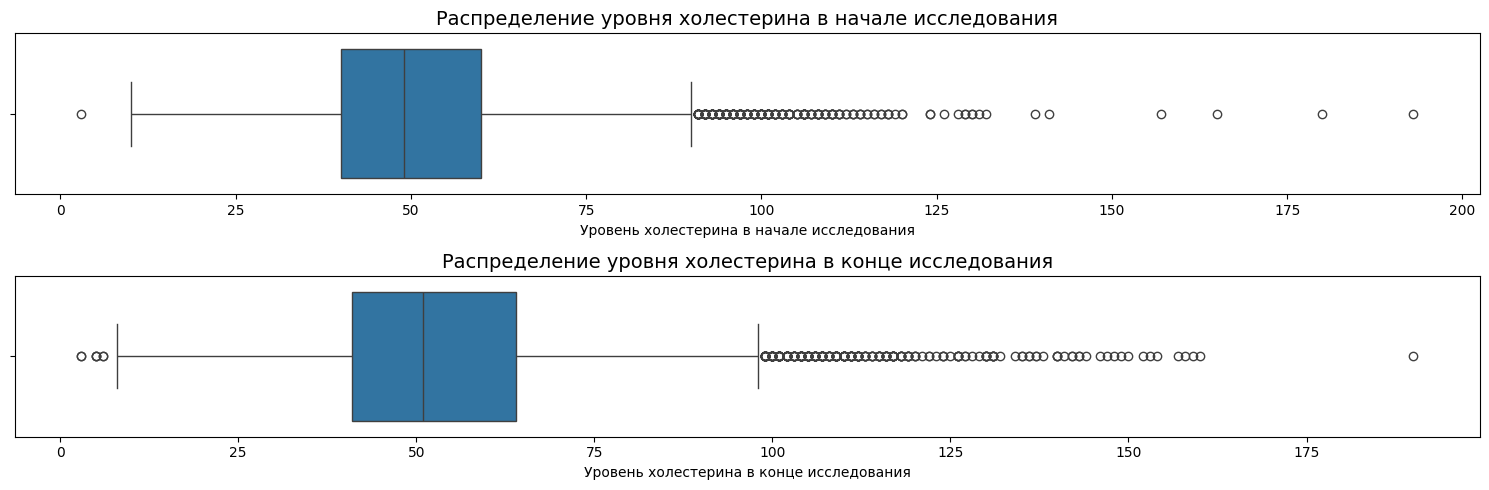

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 5))
boxplot = sns.boxplot(data=general_df, x='chol_value_day_min', ax=axes[0]);
boxplot.set_title('Распределение уровня холестерина в начале исследования', fontsize=14);
boxplot.set_xlabel('Уровень холестерина в начале исследования', fontsize=10)

boxplot = sns.boxplot(data=general_df, x='chol_value_day_max', ax=axes[1]);
boxplot.set_title('Распределение уровня холестерина в конце исследования', fontsize=14);
boxplot.set_xlabel('Уровень холестерина в конце исследования', fontsize=10);

fig.tight_layout()

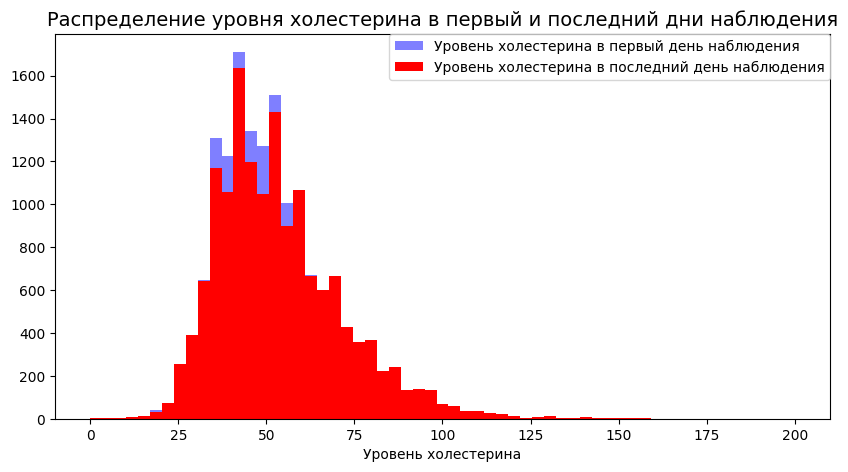

In [32]:
data_chol_min = general_df['chol_value_day_min']
data_chol_max = general_df['chol_value_day_max']

fig = plt.subplots(figsize=(10, 5))
bins = np.linspace(start=0, stop=200, num=60)

plt.hist(data_chol_min, bins=bins, alpha=0.5, label='values', color='blue')
plt.hist(data_chol_max, bins=bins, alpha=1, label='values', color='red');

plt.legend(['Уровень холестерина в первый день наблюдения', 'Уровень холестерина в последний день наблюдения'], borderaxespad=0, fontsize=10)
plt.title('Распределение уровня холестерина в первый и последний дни наблюдения', fontsize=14);
plt.xlabel('Уровень холестерина', fontsize=10);


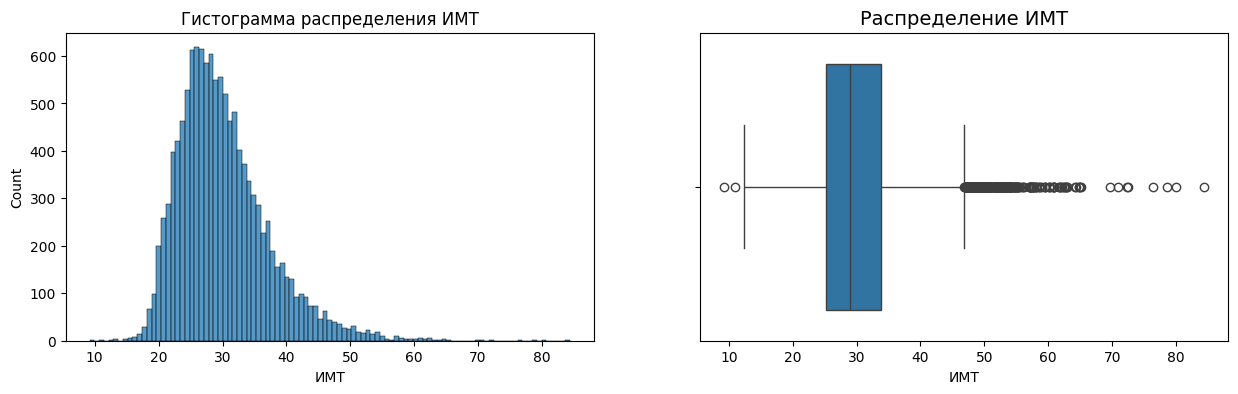

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=general_df, x='bmi', ax=axes[0]);
histplot.set_title('Гистограмма распределения ИМТ');
histplot.set_xlabel('ИМТ', fontsize=10);

boxplot = sns.boxplot(data=general_df, x='bmi', ax=axes[1]);
boxplot.set_title('Распределение ИМТ', fontsize=14);
boxplot.set_xlabel('ИМТ', fontsize=10);

In [34]:
# Проверим есть ли субъекты с сомнительными значениями FIB-4 или с отсутствием фиброза.
general_df[general_df['fib4_value_day_min'] < 2.67].shape[0]

0

In [35]:
fib_data = general_df.query('fib4_value_day_min > 2.67')

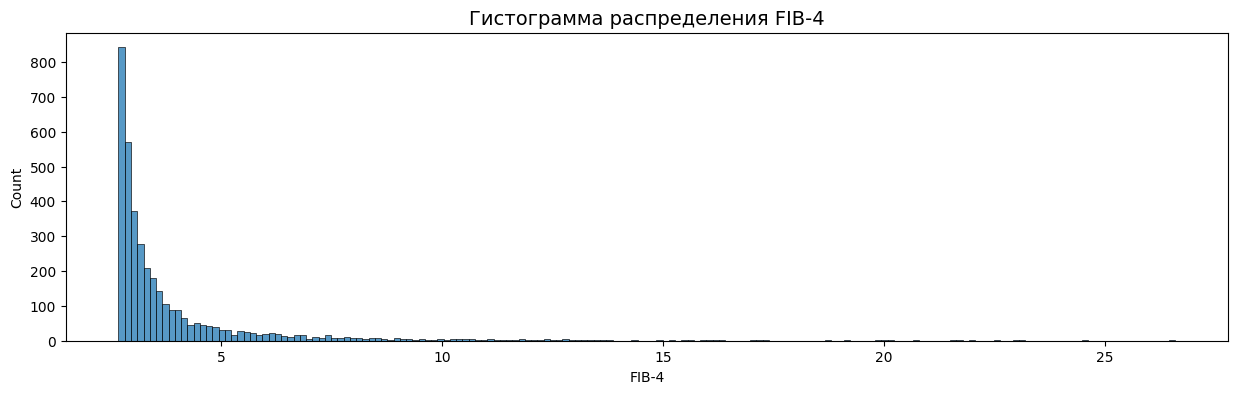

In [36]:
fig = plt.subplots(figsize=(15, 4))
histplot = sns.histplot(data=fib_data, x='fib4_value_day_min');
histplot.set_title('Гистограмма распределения FIB-4', fontsize=14);
histplot.set_xlabel('FIB-4', fontsize=10);


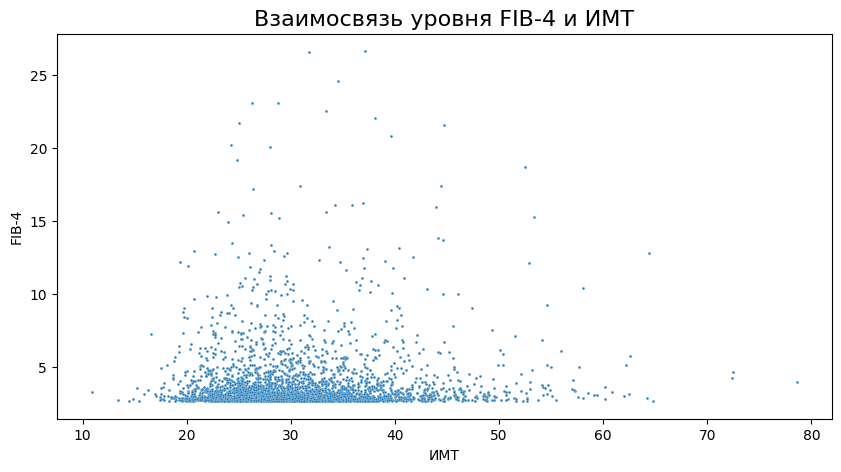

In [37]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=general_df,
    x='bmi',
    y='fib4_value_day_min',
    s=4,
    sizes=(100, 400)

)
scatterplot.set_title('Взаимосвязь уровня FIB-4 и ИМТ', fontsize=16)
scatterplot.set_xlabel('ИМТ')
scatterplot.set_ylabel('FIB-4');

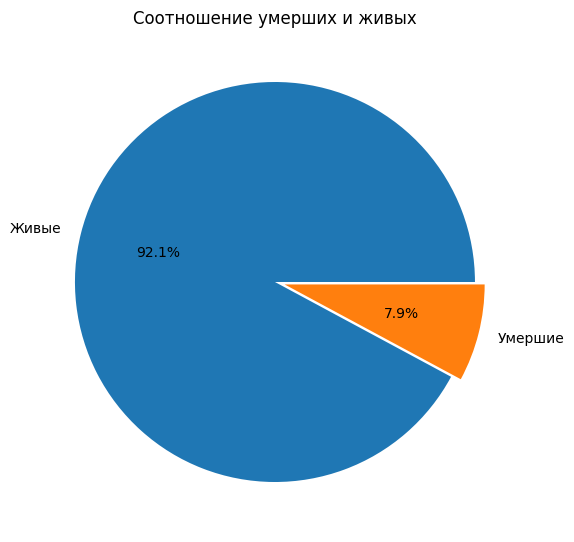

In [38]:
status_data = general_df.groupby(['status'])['id'].count()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    status_data,
    autopct='%.1f%%',
    explode = [0.0, 0.05],
    labels=['Живые', 'Умершие']
);
axes.set_title('Соотношение умерших и живых');

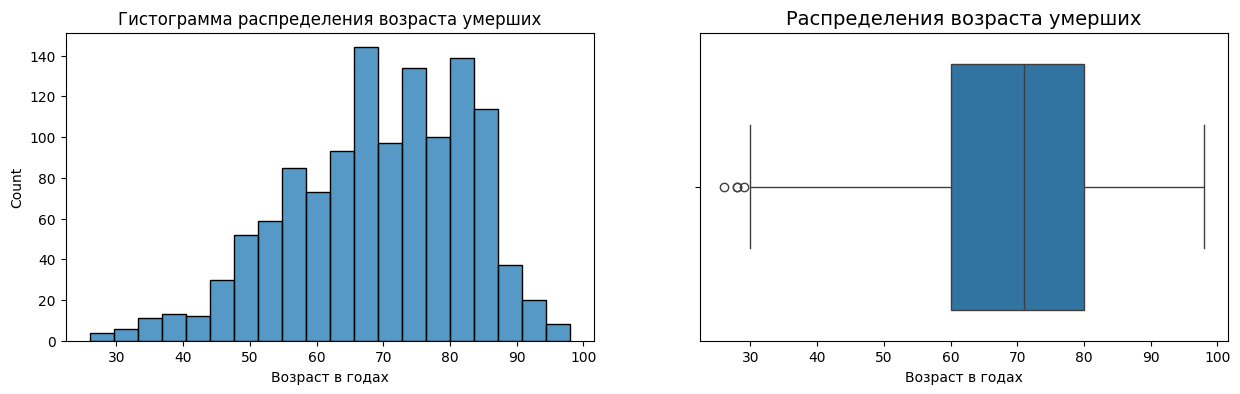

In [39]:
dead_data = general_df.query('status == 1')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=dead_data, x='age', ax=axes[0]);
histplot.set_title('Гистограмма распределения возраста умерших');
histplot.set_xlabel('Возраст в годах', fontsize=10);

boxplot = sns.boxplot(data=dead_data, x='age', ax=axes[1]);
boxplot.set_title('Распределения возраста умерших', fontsize=14);
boxplot.set_xlabel('Возраст в годах', fontsize=10);

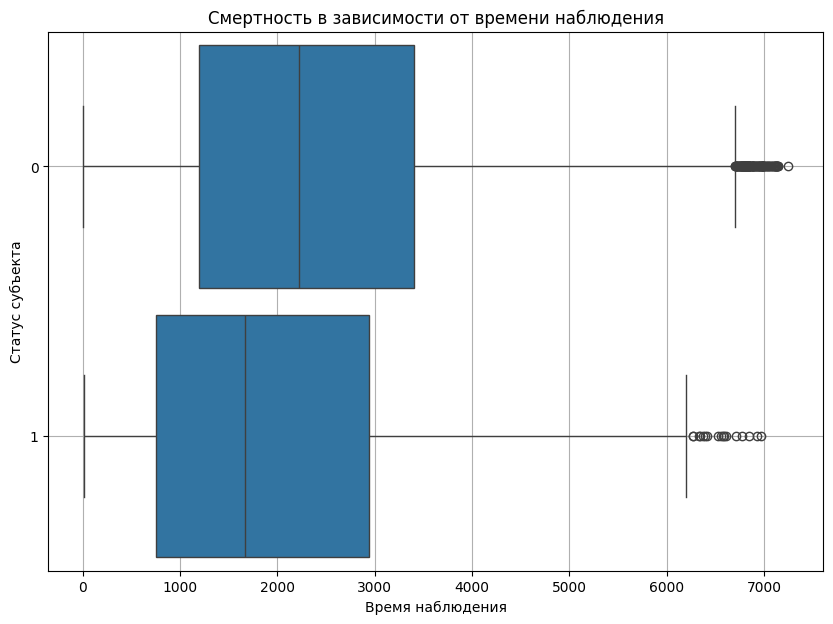

In [40]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=general_df,
    y='status',
    x='futime',
    orient='h',
    width=0.9,
)
boxplot.set_title('Смертность в зависимости от времени наблюдения');
boxplot.set_xlabel('Время наблюдения');
boxplot.set_ylabel('Статус субъекта');
boxplot.grid()

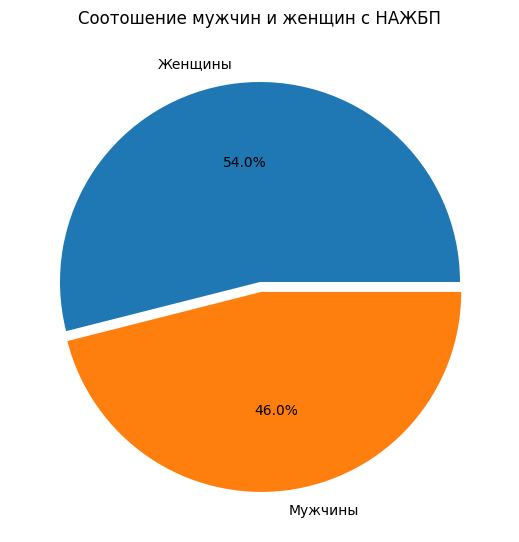

In [41]:
male_data = general_df.groupby(['male'])['id'].count()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    male_data,
    autopct='%.1f%%',
    explode = [0.0, 0.05],
    labels=['Женщины', 'Мужчины']);
axes.set_title('Соотошение мужчин и женщин с НАЖБП');

# Очистка данных

In [42]:
isnull_data = general_df.isnull().mean().round(2).sort_values(ascending=False)
isnull_data

smoke_day_min          0.79
smoke_value_day_max    0.79
smoke_day_max          0.79
smoke_value_day_min    0.79
fib4_day_min           0.76
fib4_value_day_max     0.76
fib4_day_max           0.76
fib4_value_day_min     0.76
sbp_day_min            0.52
sbp_day_max            0.52
sbp_value_day_min      0.52
sbp_value_day_max      0.52
bmi                    0.22
weight                 0.21
height                 0.11
chol_day_min           0.03
chol_value_day_min     0.03
chol_day_max           0.03
chol_value_day_max     0.03
status                 0.00
futime                 0.00
male                   0.00
id                     0.00
case.id                0.00
age                    0.00
dtype: float64

In [43]:
#отбрасываем столбцы с числом пропусков более 30% (100-70)
thresh = general_df.shape[0] * 0.7
cleaned = general_df.dropna(thresh=thresh, axis=1)

In [44]:
cleaned.duplicated().mean()*100

np.float64(0.0)

In [45]:
outliers_h_high = cleaned[cleaned['height'] > 210] 
outliers_h_small = cleaned[cleaned['height'] < 140]
outliers_bmi = cleaned[cleaned['bmi'] < 12] 

cleaned = cleaned.drop(outliers_h_small.index, axis=0)
cleaned = cleaned.drop(outliers_h_high.index, axis=0)
cleaned = cleaned.drop(outliers_bmi.index, axis=0)

print(f'Результирующее число записей: {cleaned.shape[0]}')

Результирующее число записей: 15638


In [46]:
cleaned

,id,age,male,weight,height,bmi,case.id,futime,status,chol_day_min,chol_value_day_min,chol_day_max,chol_value_day_max
0,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,-459.0,75.0,5420.0,79.0
1,2,67,0,70.4,168.0,24.884028,14817.0,624,0,-5866.0,61.0,-265.0,86.0
2,3,53,1,105.8,186.0,30.453537,3.0,1783,0,-3326.0,52.0,-365.0,52.0
3,4,56,1,109.3,170.0,37.830100,6628.0,3143,0,-1273.0,47.0,2912.0,41.0
4,5,68,1,NaN,NaN,NaN,1871.0,1836,1,-2518.0,45.0,617.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15661,17560,56,0,84.6,159.0,33.296128,17560.0,628,0,-5674.0,47.0,-1836.0,40.0
15662,17562,46,0,53.0,161.0,20.501023,12713.0,1894,0,-3245.0,46.0,1614.0,86.0
15663,17563,52,1,111.8,154.0,47.335905,17563.0,3841,0,-4218.0,29.0,3841.0,37.0
15664,17564,59,0,57.3,NaN,NaN,16164.0,5081,0,-1417.0,60.0,-1323.0,58.0


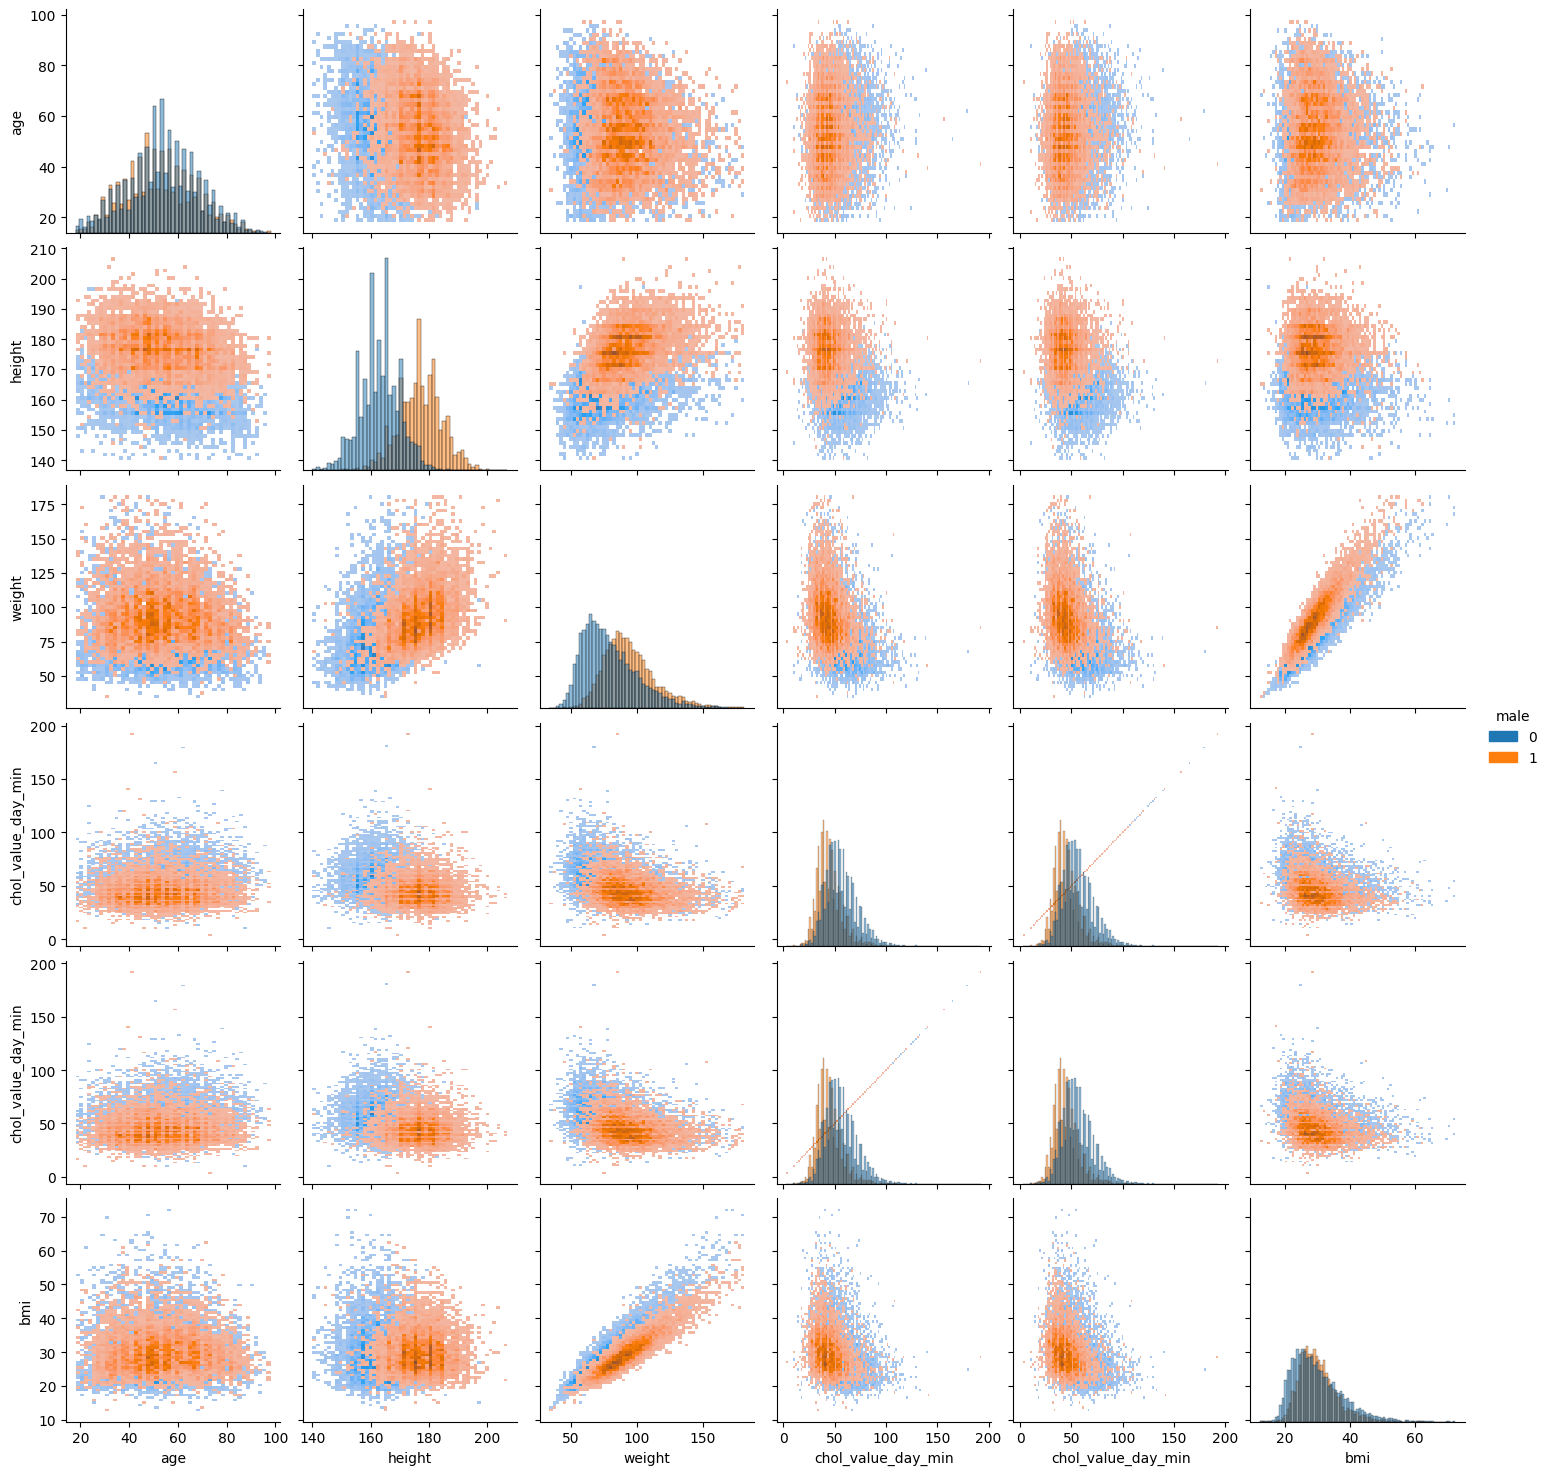

In [47]:
fig = sns.pairplot(
    cleaned, 
    vars=['age', 'height', 'weight', 'chol_value_day_min', 'chol_value_day_min', 'bmi'], 
    kind='hist',
    hue='male');

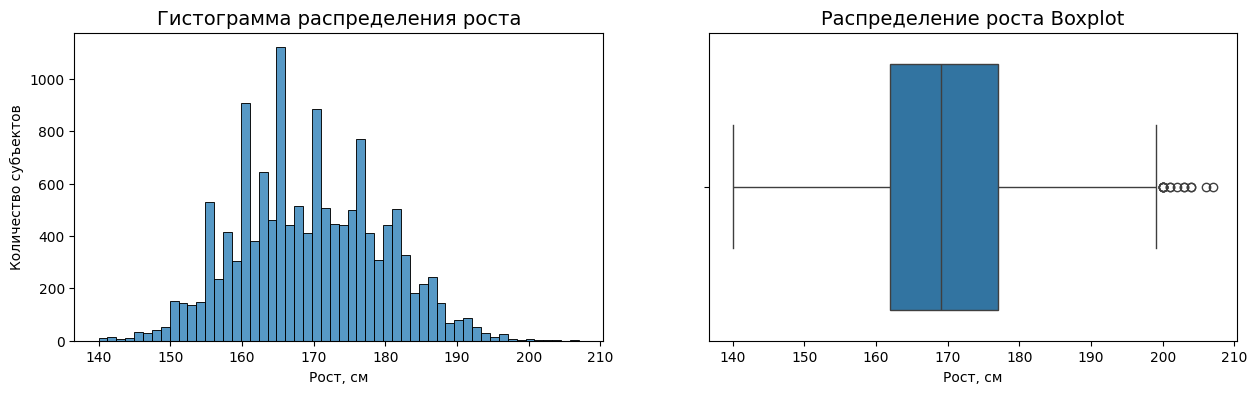

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=cleaned, x='height', ax=axes[0]);
histplot.set_title('Гистограмма распределения роста', fontsize=14);
histplot.set_xlabel('Рост, см', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);


boxplot = sns.boxplot(data=cleaned, x='height', ax=axes[1]);
boxplot.set_title('Распределение роста Boxplot', fontsize=14);
boxplot.set_xlabel('Рост, см', fontsize=10);

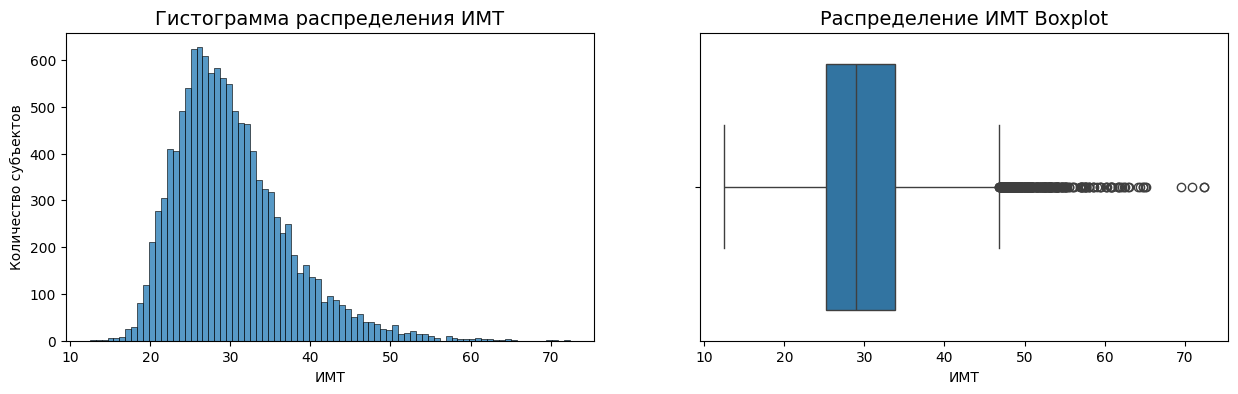

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=cleaned, x='bmi', ax=axes[0]);
histplot.set_title('Гистограмма распределения ИМТ', fontsize=14);
histplot.set_xlabel('ИМТ', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);


boxplot = sns.boxplot(data=cleaned, x='bmi', ax=axes[1]);
boxplot.set_title('Распределение ИМТ Boxplot', fontsize=14);
boxplot.set_xlabel('ИМТ', fontsize=10);

# Подведение итогов и выводы

Для анализа были предоставлены три таблицы. При знакомстве с данными выявлено: 
- Первый датасет почти не требует обработки и содержит много полезной информации, где меньше 30% пропусков в признаках роста, массы тела и ИМТ; 
- Второй датасет требует перевода в широкий формат, где больше половины записей должны стать признаками (столбцами), пропусков, на первый взгляд не было;
- Третий предоставленный файл не имеет никакого отношения к первым двум. 

Для начала я удалила дубликаты. В первом датасете дубликатов не оказалось, во втором - 3817 дублирующих друг друга записей. 

Следующим этапом я посмотрела на значения измеряемых показателей. Мне показалось, что показатели дублируют друг друга. Например, уровень холестерина и ЛПВП, САД и ДАД. Для проверки гипотезы я написала функцию, которая анализирует датафреймы отдельных признаков и сравнивает записи. Оказалось, что ДАД это копия столбца САД, а ОХ и ЛПВП совпадают на 77%. Конечно, можно предположить, что показатели дублируются из-за небольшого разброса этих показателей в группе людей с НАЖБП, но в записях указаны также дни измерения, что снижает риски ошибки в поисках дубликатов. Судя по значениям АД, везде указано АД, поэтому я удалила данные о ДАД, а также удалила данные ЛПВП, оставив только уровень ОХ. После этого количество записей во втором датафрейме сократилось на 161259 записей. 

Далее я посмотрела на отдельные датафреймы, сформированные по id субъектов, и увидела, что в масштабе большого датасета измерения были хаотичными: они проводились в разные дни, измерялись не все показатели. Также почему-то один пациент в один день курит, а в другой - нет. Что это значит? Что он курит периодически или что он перестал курить в ходе исследования? Наиболее часто встречались измерения холестерина и АД, по ним даже можно было отследить динамику, но, опять же, в формате большого датасета невозможно анализировать эти показатели из-за разных дней измерения и разной частоты измерений. Я оставила показатели по каждому признаку только в первый и последний день исследования, предположив, что так можно более наглядно отразить динамику изменений этих показателей в ходе исследования.

Для того, чтобы перевести второй датасет в широкий формат с нужными столбцами (значения показателей в первые и последние дни наблюдения), я воспользовалась словарями. Я написала функцию, которая принимает датафрейм и на его основе составляет сложный словарь с нужными мне значениями и днями, в которые эти значения измеряли. Затем я обратно перевела словарь в датафрейм, количество уникальных id равнялось числу записей (один id - одна запись).

После перевода второго датасета в широкий формат я объединила его с первым, пришлось игнорировать данные о 1883 субъектах, т.к. во втором датасете было меньше уникальных id.

При первом анализе данных объединенного датасета мне было интересно узнать меняется ли динамика уровня ОХ. Как оказалось, наглядных изменений нет, уровень холестерина имеет даже тенденцию к повышению. Распределение ИМТ стремится к нормальному, с единичными выбросами. Далее я планировала ввести категориальный признак для оценки фиброза печени, но измерений очень мало и все индексы свидетельствуют о выраженном фиброзе печени. Взаимосвязи ИМТ и FIB-4 не выявлено. За время исследования умерло 8% субъектов, возраст которых в среднем от 60 до 90 лет. Соотношение мужчин и женщин в исследовании примерно одинаковое, женщин на 4% больше.
 
В объединенном датасете оказалось достаточно много пропусков в измеряемых показателях. В FIB-4 76% пропусков и этот показатель измерялся однократно, т.к. его график распределения представляет собой прямую линию. Данные о курении невозможно интерпретировать, особенно учитывая, что в данных 79% пропусков. В уровне АД 52% пропусков. Я удалила все признаки, в которых больше 30% пропусков. 

Очищенный датасет содержит данные о 15638 субъектах с НАЖБП. Прямая взаимосвязь прослеживается только между ИМТ и массой тела, что неудивительно, а вот с ростом взаимосвязь не такая явная. Данное исследование описательное и не показало динамики изменений уровня холестерина и АД в зависимости от времени наблюдения. В дальнейших исследованиях следует: назначить определенные дни измерений показателей (25, 50, 100 и т.д. дни наблюдения); ввести показатели, напрямую отражающие функцию печени (АСТ, АЛТ, FIB-4, коагулограмма и т.д.). Также следует рассказать субъектам о самом заболевании и что можно сделать для снижения рисков осложнений. Судя по этим данным, люди наблюдались годами, но никак не старались изменить свою жизнь.